<font size = '6'><b>Discrete Fourier Transformation (DFT)</b></font>

<table style="border-style: hidden; border-collapse: collapse;" width = "90%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 30%>
        Prof. Seungchul Lee<br>
        iSystems Design Lab<br>UNIST<br>http://isystems.unist.ac.kr/
        </td>
    </tr>
</table>


Table of Contents
<div id="toc"></div>

# 1. Fourier Series

## 1.1. Delta Dirac Function

$$ 
\sum_{n = 1,2,3,\cdots}\cos(n \theta) = \cos \theta + \cos 2\theta + \cos 3\theta + \cdots $$

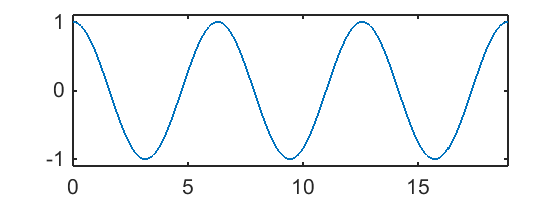

In [4]:
%plot -s 560,200

theta = linspace(0,6*pi,2^8);
x1 = cos(theta);
plot(theta,x1), axis tight, ylim([-1.1 1.1])

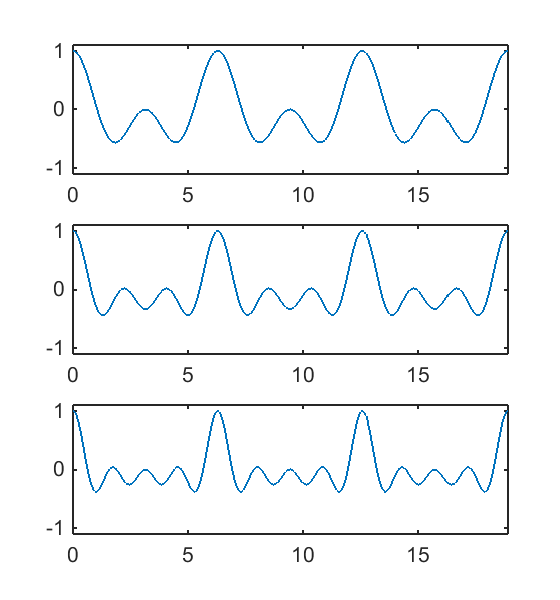

In [11]:
%plot -s 560,600

x2 = x1 + cos(2*theta);
x3 = x2 + cos(3*theta);
x4 = x3 + cos(4*theta);
subplot(3,1,1), plot(theta, x2/2), axis tight, ylim([-1.1 1.1])
subplot(3,1,2), plot(theta, x3/3), axis tight, ylim([-1.1 1.1])
subplot(3,1,3), plot(theta, x4/4), axis tight, ylim([-1.1 1.1])

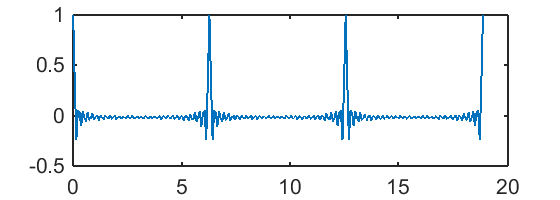

In [5]:
%plot -s 560,200

x = zeros(1,2^8);

N = 30;
for n = 1:N
    x = x + cos(n*theta);
end
plot(theta,x/N)

## 1.2. Square Wave

$$ 
\sum_{n = 1,3,5,\cdots}\frac{4}{\pi n} \sin (n\theta) = \frac{4}{\pi} \sin \theta + \frac{4}{3 \pi} \sin 3\theta + \frac{4}{5 \pi} \sin 5\theta + \cdots$$



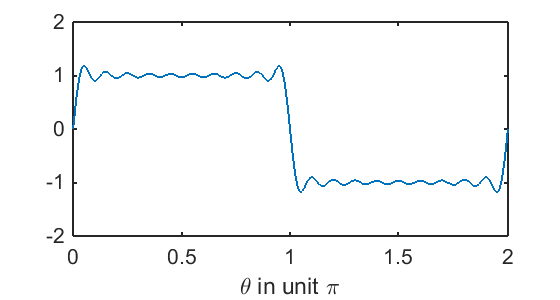

In [6]:
%plot -s 560,300

N = 2^8;
x = zeros(1,N);
theta = linspace(0,2*pi,N);

for n = 1:2:20
    x = x + 4/(pi*n)*sin(n*theta);
end

plot(theta/pi,x), xlabel('\theta in unit \pi')

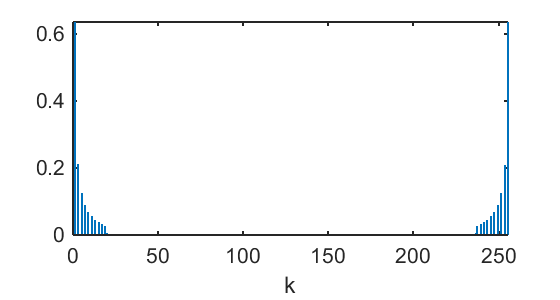

In [11]:
%plot -s 560,300

X = dft(x,N)/N;
stem(0:N-1,abs(X),'marker','none'), axis tight, xlabel('k')

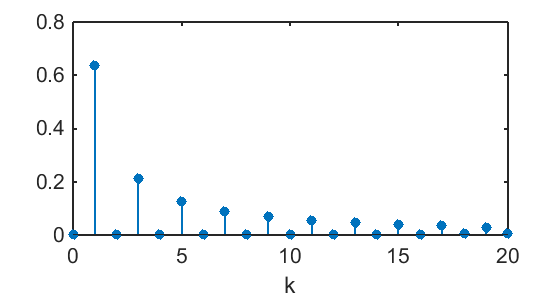

In [13]:
%plot -s 560,300

stem(0:N-1,abs(X),'filled','markersize',4), xlabel('k')
xlim([0,20])

In [15]:
% sound of square wave

N = 2^10;
x = zeros(1,N);
theta = linspace(0,2*pi,N);

for n = 1:2:30
    x = x + 4/(pi*n)*sin(n*theta);
end

x_rep = repmat(x,1,100);
Fs = 44100;

sound(x_rep,Fs);

## 1.3. Sawtooth wave

$$ \frac{1}{2} - \frac{1}{\pi} \sum_{n=1}^{\infty}\frac{1}{n} \sin(\pi \theta)  $$



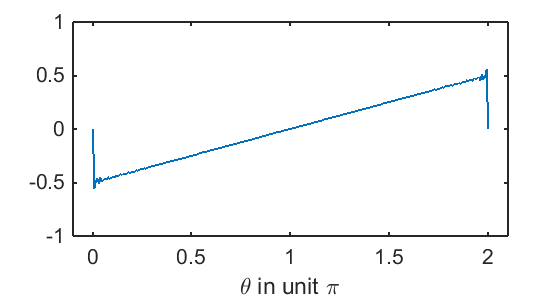

In [19]:
%plot -s 560,300

N = 2^8;
x = zeros(1,N);
theta = linspace(0,2*pi,N);


for n = 1:100
    x = x - 1/(pi*n)*sin(n*theta);
end

plot(theta/pi,x), 
xlim([-0.1 2.1]), xlabel('\theta in unit \pi')

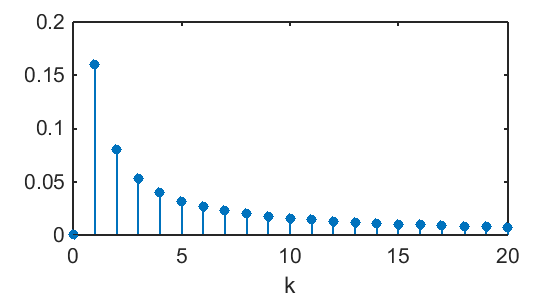

In [21]:
%plot -s 560,300
X = fft(x)/N;

stem(0:N-1,abs(X),'filled','markersize',4), xlabel('k')
xlim([0,20])

In [23]:
% sound of sawtooth wave

N = 2^10;
x = zeros(1,N);
theta = linspace(0,2*pi,N);

for n = 1:30
    x = x - 1/(pi*n)*sin(n*theta);
end

x_rep = repmat(2*x,1,50); % make a signal -1 to 1 and repeat (periodic)
Fs = 44100;

sound(x_rep,Fs);

# 2. Eigen-analysis

## 2.1. Basis

A __basis__ $\{b_k\}$ for a vector space $V$ is a collection of vectors from V that __linearly independent__ and __span__ $V$


__Basis matrix__: Stack the basis vectors $b_k$ as columns

$$ B \,\,=\,\, [b_0 \,| \,b_1 \,| \,b_2 \,|\, \cdots \,| \,b_{N-1}]$$

Using this matrix, We can now write a linear combination of basis elements as the matrix/vector product

$$ x \, = \, B\, a\, =\, a_0 b_0 + a_1 b_1 +\, \cdots\, + a_{N-1} b_{N-1} \, =\,  \sum_{k=0}^{N-1} a_k b_k \, =\, [b_0\, |\, b_1\, |\, \cdots \, |\, b_{N-1}]\begin{bmatrix}
a_0\\
a_1\\
\vdots\\
a_{N-1}
\end{bmatrix} $$


An __orthogonal basis__ $\{b_k\}_{k=0}^{N-1}$ for a vector space V is a basis whose elements are mutually orthogonal

$$\langle b_k,b_l\rangle \, =\, 0\, ,\quad k\, \neq\, l$$

An __orthonormal basis__$\{b_k\}_{k=0}^{N-1}$ for a vector space V is a basis whose elements are mutually orthogonal and normalized (in the 2-norm)

$$\langle b_k,b_l\rangle \, =\, 0\, ,\quad k\, \neq\, l$$

$$\| b_k\|_2 \, = \, 1$$

## 2.2. Orthogonal Bases
Signal Representation by Orthonormal Basis


$$ x = B\alpha = \sum_{k=0}^{N-1}\alpha_kb_k $$ 
$$ \alpha = B^Hx \qquad \text{or} \qquad \alpha_k = \big<x,b_k\big> $$


- **Synthesis**: Build up the signal $x$ as a linear combination of the basis elements $b_k$ weighted by the weights $\alpha_k$

- **Analysis**: Compute the weights $\alpha_k$ such that the synthesis produces $x$; the weight $\alpha_k$ measures the similarity between $x$ and the basis element $b_k$


## 2.3. Eigenvector and eigenvalues

$$
Av=\lambda v$$

Using this, we can find this equation

$$AV\, =\, V\Lambda$$


$$V\, = \, [v_0|v_1|\cdots |v_{N-1}], \, \Lambda = \begin{bmatrix}
\lambda_0 & & & \\
 & \lambda_1 & & \\
 & & \ddots & \\
 & & &\lambda_{N-1}
\end{bmatrix}$$

We can change to

$$A = V\Lambda V^{-1} \Rightarrow \, Eigendecomposition$$
$$V^{-1} AV\, = \, \Lambda$$


> - Eigenvectors $v$ are input signals that emerge at the system output unchanged (except for a scaling by the eigenvalue \lambda) and so are somehow "fundamental" to the system

> - Eigenanalysis of LTI Systems (Finite-Length Signals)


> - Goal: Calcuate the **eigenvectors** and **eigenvalues** of **H**


> - Fact: The eigenvectors of a circulent matrix (LTI system) are the complex **harmonic sinusoids**

> - Fact: The eigenvalue $\lambda \in C$ corresponding to the sinusoid eigenvector $s_k$ is called the frequency response at frequency $k$ since it measures how the system "responds" to $s_k$

$$ \lambda_k = \sum_{n=0}^{N-1}h[n]e^{-j\frac{2\pi}{N}kn} = \big< h,s_k\big> = H_u[k] $$

## 2.4. Eigenvector Matrix of Harmonic Sinusoids

$$ 
S = \big[s_0 | s_1 | \cdots | s_{N-1} \big]  $$

$$s_k[n]=\frac{1}{\sqrt{N}}e^{j\frac{2\pi}{N}kn}$$

> Stack $N$ normalized harmonic sinusoid $\{s_k\}_{k=0}^{N-1}$ as columns into an $N\times N$ complex orthonormal basis matrix

<img src="./image_files/LTI_eigenvector.jpg" width = 300>

$$\begin{align*} s_k[n]\, \ast h[n] \, &= \, \sum \limits_{m=0}^{N-1} s_k[(n-m)_N]\, h[m]\, = \, \sum \limits_{m=0}^{N-1} \frac{e^{j\frac{2 \pi}{N}k(n-m)_N}}{\sqrt{N}}\, h[m]\\ 
& = \, \sum \limits_{m=0}^{N-1}\frac{e^{j\frac{2 \pi}{N}k(n-m)}}{\sqrt{N}}\, h[m]\, =\, \sum \limits_{m=0}^{N-1}\frac{e^{j\frac{2 \pi}{N}kn}}{\sqrt{N}}e^{-j\frac{2 \pi}{N}km}\, \, h[m]\\
& = \, \left(\sum \limits_{m=0}^{N-1}e^{-j\frac{2 \pi}{N}km}\, h[m]\,\right)\frac{e^{j\frac{2 \pi}{N}kn}}{\sqrt{N}} \, = \, \lambda _k \, s_k[n]
\end{align*}$$

## 2.5. Eigenvalues of LTI Systems

$$
\lambda _k \, =\, \sum\limits_{m=0}^{N-1} h[n]\, e^{-j\frac{2\pi}{N}kn} \, =\, \langle h,s_k\rangle \, =\, H_u[k]$$

$\lambda _k$ means the number of $s_k$ in $h[n]$ $\implies$ similarity

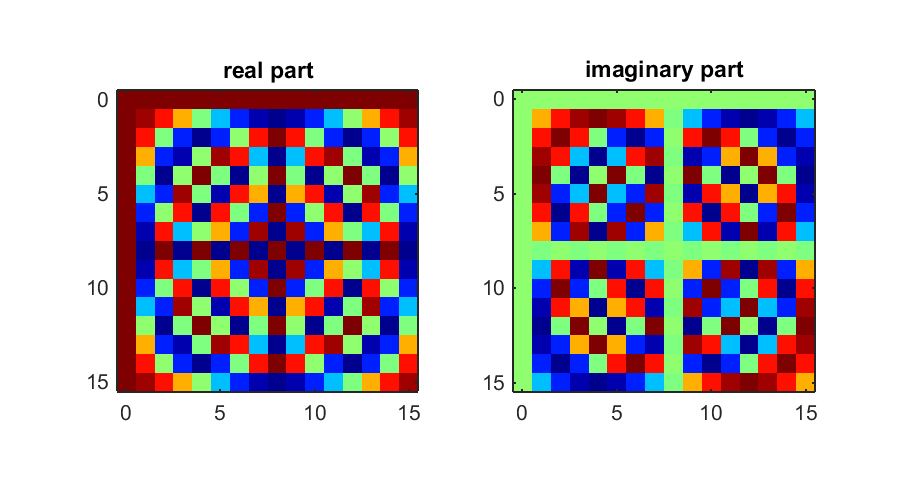

In [11]:
%plot -s 900,500

% visualize eigenvector matrix 

N = 16;
n = 0:N-1;
k = 0:N-1;

S = 1/sqrt(N)*exp(1j*2*pi/N).^(n'*k);

subplot(1,2,1), imagesc(n,k,real(S)); colormap('jet'); axis('square');
title('real part')
subplot(1,2,2), imagesc(n,k,imag(S)); colormap('jet'); axis('square');
title('imaginary part')

## 2.6. Eigendecomposition and Diagonalization of an LTI Systems

- $H$ is LTI System matrix

- $S$ is harmonic sinusoid eigenvectors matrix

- $\Lambda$ is eigenvalue diagonal matrix

$$H=S \Lambda S^H$$

<img src="./image_files/eig_decomposition.png" style="border:1px solid black", width = 700>

# 3. Discrete Fourier Transform (DFT)

## 3.1 Harmonic Sinusoids are an Orthonormal Basis

$$
s_k[n] \, =\, \frac{e^{j\frac{2 \pi}{N}kn}}{\sqrt{N}}$$

$$\langle s_k,s_l\rangle \, =\, 0, \quad k\, \neq l\quad \quad \lVert s_k \rVert_2\, =\, 1$$

## 3.2 DFT & Inverse DFT

- DFT 
$$X\, =\, S^Hx$$

$$X[k]\, =\, \langle x,s_k\rangle\, =\, \sum \limits_{k=0}^{N-1} X[k]\,\frac{e^{-j\frac{2 \pi}{N}kn}}{\sqrt{N}}$$

It is finding how many certain frequncy

- Inverse DFT
$$x\, =\, SX$$

$$x[n]\, =\, \sum \limits_{k=0}^{N-1}X[k]\, \frac{e^{j\frac{2 \pi}{N}kn}}{\sqrt{N}}$$

It is returing to time domain


<img src="./image_files/signal_rep.png" style="border:1px solid black", width = 700>

<img src="./image_files/interpreation.png" style="border:1px solid black", width = 700>

<img src="./image_files/unnormalized_DFT.png" style="border:1px solid black", width = 700>

## 2.5. Unnormalized DFT 

In [25]:
%% DFT without using the built-in function

x = [2 3 -1 4];
N = length(x);
X = zeros(1,N);

for k = 0:N-1
    for n = 0:N-1
        X(k+1) = X(k+1) + x(n+1)*exp(-1j*2*pi/N*n*k);
    end
end

X    

X =

   8.0000 + 0.0000i   3.0000 + 1.0000i  -6.0000 - 0.0000i   3.0000 - 1.0000i

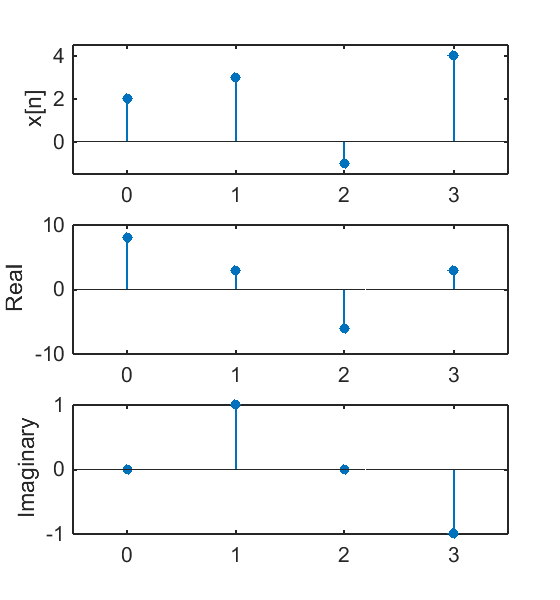

In [28]:
%plot -s 560,600

% plot a discrete-time signal
xn = 0:N-1;
k = 0:N-1;

subplot(3,1,1), stem(xn,x,'filled','markersize',4), axis([-0.5,3.5,-1.5,4.5]), ylabel('x[n]')
subplot(3,1,2), stem(k,real(X),'filled','markersize',4), xlim([-0.5,3.5]), ylabel('Real')
subplot(3,1,3), stem(k,imag(X),'filled','markersize',4), xlim([-0.5,3.5]), ylabel('Imaginary')

FFT algorithms are so commonly employed to compute DFTs that the term 'FFT' is often used to mean 'DFT': DFT refers to a mathematical transformation or function, whereas 'FFT' refers to a specific family of algorithms for computing DFTs.

- use fft command to compute dft
- fft (computationally efficient)

In [14]:
%% DFT using FFT
% fft(X) is the discrete Fourier transform (DFT) of vector X.
% get the same results

fft(x)

ans =

   8.0000 + 0.0000i   3.0000 + 1.0000i  -6.0000 + 0.0000i   3.0000 - 1.0000i

- can use dft function defined below, but
- computationally expensive

In [15]:
% see the below dft function
dft(x,4)

ans =

   8.0000 + 0.0000i   3.0000 + 1.0000i  -6.0000 - 0.0000i   3.0000 - 1.0000i

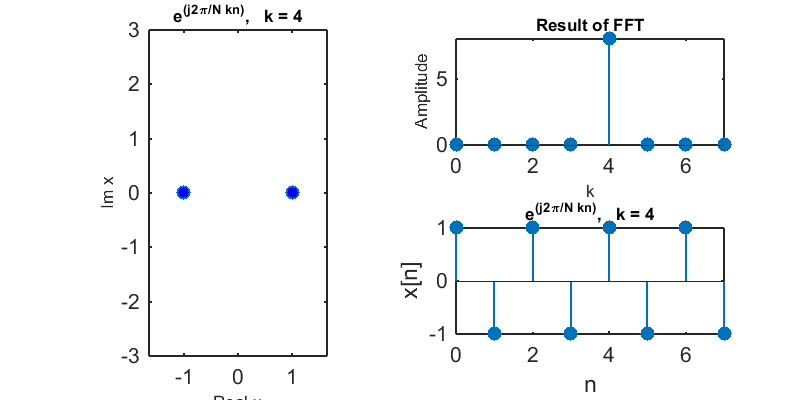

In [4]:
%plot -s 800,400

k = 4;                         % index for freqeuncy

N = 8;
n = 0:N-1;                    % sampling period

x = exp(1j*2*pi/N*k*n);           % harmonic complex exponential
X = dft(x,N);


subplot(2,2,[1,3]); plot(real(x),imag(x),'o','MarkerFaceColor','b')
axis equal; ylim([-3 3])
xlabel('Real {x}','Fontsize',8)
ylabel('Im {x}','Fontsize',8)
title(['e^{(j2\pi/N kn)},   k = ',num2str(k)],'Fontsize',8)

subplot(2,2,2); stem(n,abs(X),'filled'), axis tight
xlabel('k','Fontsize',8)
ylabel('Amplitude','Fontsize',8)
title('Result of FFT','fontsize',8)

subplot(2,2,4), stem(n,real(x),'filled'), axis tight
xlabel('n'), ylabel('x[n]')
title(['e^{(j2\pi/N kn)},   k = ',num2str(k)],'Fontsize',8)

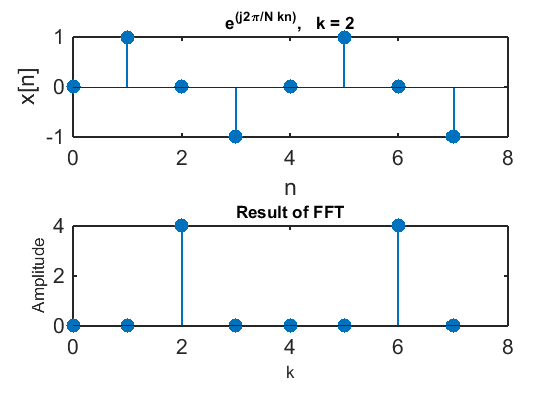

In [30]:
%plot -s 560,400

k = 2;                         % index for freqeuncy

N = 8;
n = 0:N-1;                    % sampling period

x = sin(2*pi/N*k*n);           % harmonic complex exponential
X = dft(x,N);

subplot(2,1,1), stem(n,real(x),'filled')
xlabel('n'), ylabel('x[n]')
title(['e^{(j2\pi/N kn)},   k = ',num2str(k)],'Fontsize',8)

subplot(2,1,2); stem(n,abs(X),'filled')
xlabel('k','Fontsize',8)
ylabel('Amplitude','Fontsize',8)
title('Result of FFT','fontsize',8)

# 4. DFT Properties

__DFT pair__

$$x[n] \longleftrightarrow X[k]$$

__DFT Frequencies__

- $X[k]$ measures the similarity between the time signal $x[n]$ and the harmonic sinusoid $s_k[n]$

- $X[k]$ measures the "frequency content" of $x[n]$ at frequency

$$\omega_k = \frac{2\pi}{N} k$$

__DFT and Circular Shift__

$$ x[(n-m)_N] \longleftrightarrow e^{-j\frac{2\pi}{N}km}X[k] $$

- no amplitude changed
- phase changed

__DFT and Modulation__

$$ e^{-j\frac{2\pi}{N}r ~n}x[n] \longleftrightarrow   X[(k-r)_N] $$

__DFT and Circular Convolution__

- Circular convolution in the time domain $=$ multiplication in the frequency domain

$$ 
\begin{align*}
Y[k] &= H[k]X[k] \\
h[n]\star x[n] &\longleftrightarrow H[k]X[k] \\
y[n] &= \text{IDFT}(Y[k])
\end{align*}
$$



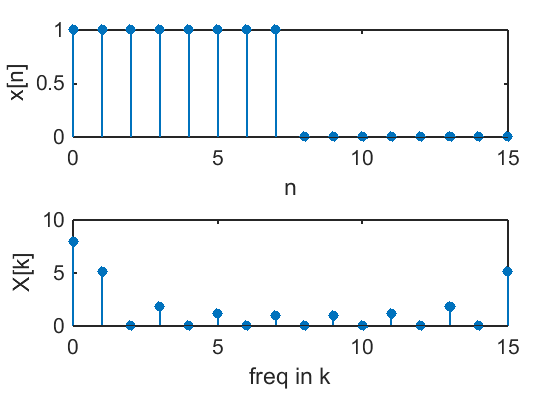

In [32]:
%plot -s 560,400

N = 16;
h = zeros(1,N);
h(1:8) = 1;
n = 0:N-1;
k = n;

X = dft(h,N);

subplot(2,1,1), stem(n,h,'filled','markersize',4), xlabel('n'), ylabel('x[n]')
subplot(2,1,2), stem(k,abs(X),'filled','markersize',4), xlabel('freq in k'), ylabel('X[k]')

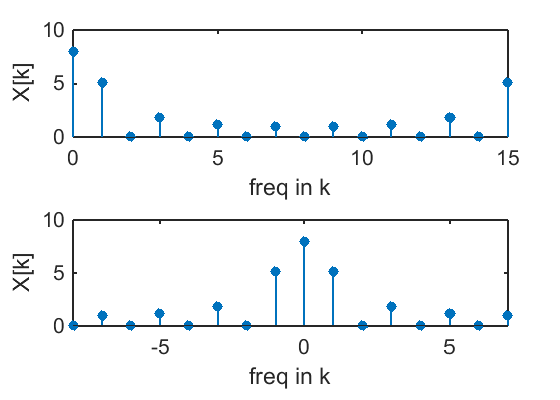

In [33]:
kr = [0:N/2-1 -N/2:-1];
ks = fftshift(kr);

Xs = fftshift(X);

subplot(2,1,1), stem(k,abs(X),'filled','markersize',4), xlabel('freq in k'), ylabel('X[k]')
subplot(2,1,2), stem(ks,abs(Xs),'filled','markersize',4), xlabel('freq in k'), ylabel('X[k]'), xlim([-N/2,N/2-1])

$$ e^{-j\frac{2\pi}{N}r ~n}x[n] \longleftrightarrow   X[(k-r)_N] $$

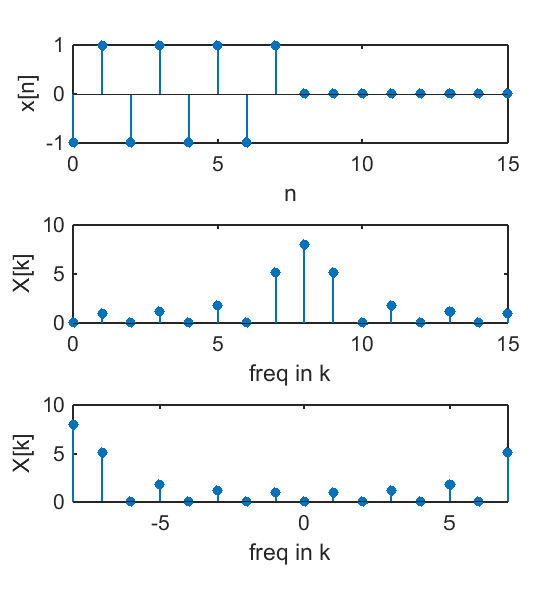

In [34]:
%plot -s 560,600

N = 16;
h = zeros(1,N);
h(1:8) = 1;

for i = 1:N
    h(i) = (-1)^i*h(i);
end

n = 0:N-1;
k = n;

X = dft(h,N);

kr = [0:N/2-1 -N/2:-1];
ks = fftshift(kr);

Xs = fftshift(X);

subplot(3,1,1), stem(n,h,'filled','markersize',4), xlabel('n'), ylabel('x[n]')
subplot(3,1,2), stem(k,abs(X),'filled','markersize',4), xlabel('freq in k'), ylabel('X[k]')
subplot(3,1,3), stem(ks,abs(Xs),'filled','markersize',4), xlabel('freq in k'), ylabel('X[k]'), xlim([-N/2,N/2-1])

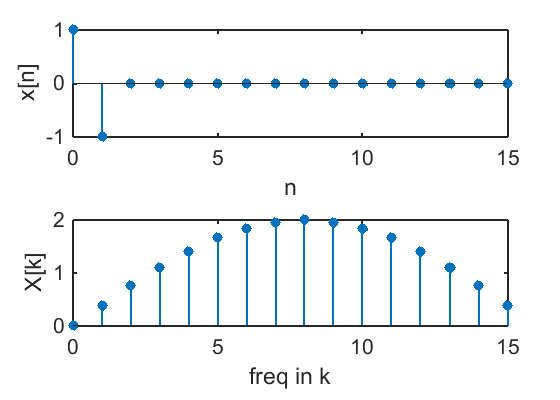

In [35]:
%plot -s 560,400

N = 16;
h = zeros(1,N);
h(1) = 1;
h(2) = -1;
n = 0:N-1;
k = n;

X = dft(h,N);

figure(1)
subplot(2,1,1), stem(n,h,'filled','markersize',4), xlabel('n'), ylabel('x[n]')
subplot(2,1,2), stem(k,abs(X),'filled','markersize',4), xlabel('freq in k'), ylabel('X[k]')

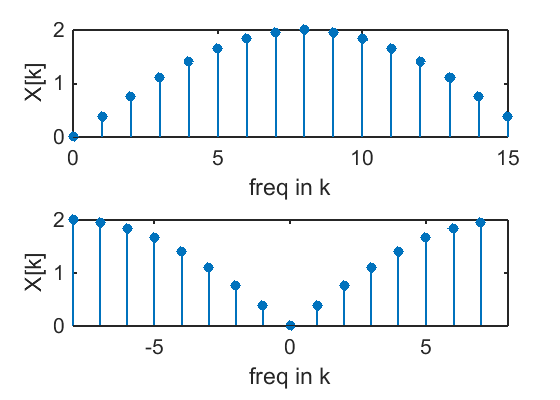

In [36]:
%plot -s 560,400

kr = [0:N/2-1 -N/2:-1];
ks = fftshift(kr);

Xs = fftshift(X);

subplot(2,1,1), stem(k,abs(X),'filled','markersize',4), xlabel('freq in k'), ylabel('X[k]')
subplot(2,1,2), stem(ks,abs(Xs),'filled','markersize',4), xlabel('freq in k'), ylabel('X[k]'), xlim([-N/2,N/2])

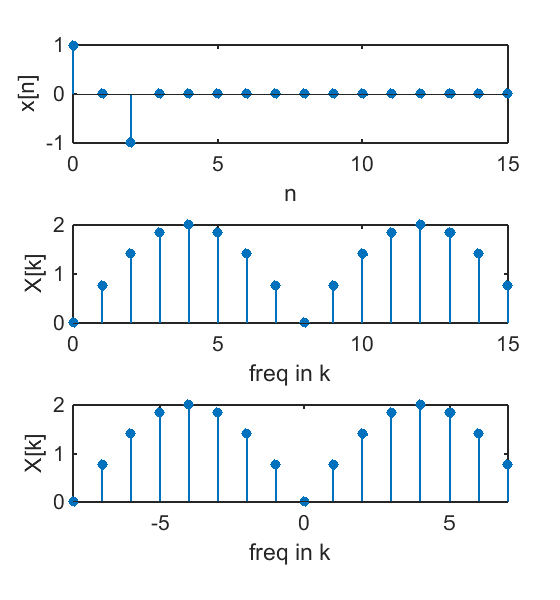

In [37]:
%plot -s 560,600

N = 16;
h = zeros(1,N);
h(1) = 1;
h(2) = 0;
h(3) = -1;
n = 0:N-1;
k = n;

X = dft(h,N);

kr = [0:N/2-1 -N/2:-1];
ks = fftshift(kr);

Xs = fftshift(X);

subplot(3,1,1), stem(n,h,'filled','markersize',4), xlabel('n'), ylabel('x[n]')
subplot(3,1,2), stem(k,abs(X),'filled','markersize',4), xlabel('freq in k'), ylabel('X[k]')
subplot(3,1,3), stem(ks,abs(Xs),'filled','markersize',4), xlabel('freq in k'), ylabel('X[k]'), xlim([-N/2,N/2-1])

# 5. Filtering in Frequency Domain

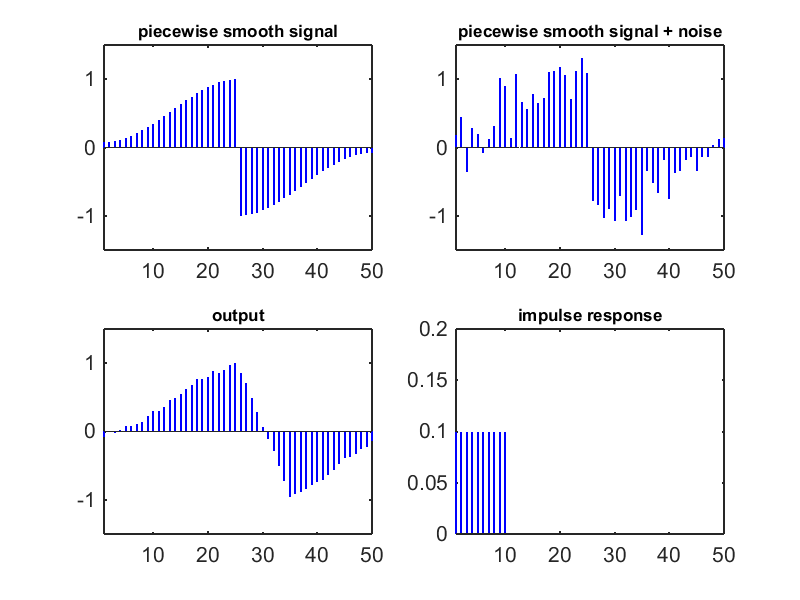

In [24]:
%plot -s 800,600

%---EXAMPLE 2
%---Denoising a piecewise smooth signal
figure('units','normalized','position',[0 0 1 1.5]);

% piecewise smooth signal
N = 50;
n = 0:N-1;
s = hamming(N) .* [ones(N/2,1); -ones(N/2,1)];

subplot(221)
stem(s,'b','Marker','none','LineWidth',1);
axis([1 N -1.5 1.5])
title('piecewise smooth signal','fontsize',8)

% add noise to the signal
x = s + 0.2*randn(N,1);

subplot(222)
stem(x,'b','Marker','none','LineWidth',1);
axis([1 N -1.5 1.5])
title('piecewise smooth signal + noise','fontsize',8)

% construct moving average filter impulse response of length M
M = 10;
%M = 3;
h = ones(M,1)/M;

h1 = h; h1(N) = 0;
subplot(224)
stem(h1,'b','Marker','none','LineWidth',1);
axis([1 N 0 0.2])
title('impulse response','fontsize',8)

% convolve noisy signal with impulse response
y = circonvt(x',h',50);

subplot(223)
%stem(y(M/2:N+M/2-1),'b','Marker','none','LineWidth',1);
stem(y,'b','Marker','none','LineWidth',1);
axis([1 N -1.5 1.5])
title('output','fontsize',8)

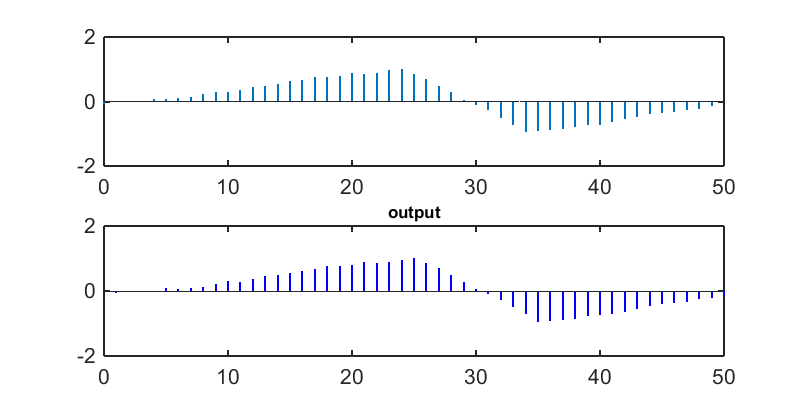

In [25]:
%plot -s 800,400
H = fft(h,N);
k = n;
figure
stem(k,abs(H))

X = fft(x);

Y = H.*X;
yi = ifft(Y);

subplot(2,1,1), stem(n,(yi),'marker','none')
subplot(2,1,2), 
%stem(y(M/2:N+M/2-1),'b','Marker','none','LineWidth',1);
stem(y,'b','Marker','none','LineWidth',1);
% axis([1 N -1.5 1.5])
title('output','fontsize',8)

```octave
function [Xk] = dft(xn,N)

% Computes Discrete Fourier Transform
% [Xk] = dft(xn,N)
% Xk = DFT coeff. array over 0 <= k <= N-1
% xn = N-point finite-duration sequence
%  N = Length of DFT
%

n = [0:1:N-1];                       % row vector for n
k = [0:1:N-1];                       % row vecor for k
WN = exp(-1j*2*pi/N);                % Wn factor
nk = n'*k;                           % creates a N by N matrix of nk values
WNnk = WN.^nk;                     % DFT matrix
Xk = xn*WNnk;                      % row vector for DFT coefficients
```

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>